# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


## Exploratory Data Analysis 

### File and parameters loading

In [99]:
problem_type = 'regression'

In [100]:
stacking = 'True'

In [101]:
data_size = 'small'

In [102]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking-main/dataset/synchronous machine.csv')

In [103]:
target_col = 'If'

#### Thresholds

In [104]:
threshold_NaN = 0.5

In [105]:
threshold_cat = 5

In [106]:
threshold_Z = 3.0

In [107]:
test_size = 0.33

In [108]:
threshold_entropy = 0.75

In [109]:
threshold_corr = 0.95

In [110]:
threshold_model = 5

In [111]:
threshold_score = 0.7

In [112]:
threshold_feature = 5

#### Drop user's columns:
* the column 'e' is correlated with 'PF'

In [113]:
user_drop_cols = ['e']

Dataset before deletion

In [114]:
display(df)

Iy    PF     e    dIf     If
0    3.0  0.66  0.34  0.383  1.563
1    3.0  0.68  0.32  0.372  1.552
2    3.0  0.70  0.30  0.360  1.540
3    3.0  0.72  0.28  0.338  1.518
4    3.0  0.74  0.26  0.317  1.497
..   ...   ...   ...    ...    ...
552  6.0  0.91  0.09  0.142  1.322
553  6.0  0.93  0.07  0.151  1.331
554  6.0  0.95  0.05  0.160  1.340
555  6.0  0.97  0.03  0.160  1.340
556  6.0  0.99  0.01  0.160  1.340

[557 rows x 5 columns]

In [115]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [116]:
display(df)

Iy    PF    dIf     If
0    3.0  0.66  0.383  1.563
1    3.0  0.68  0.372  1.552
2    3.0  0.70  0.360  1.540
3    3.0  0.72  0.338  1.518
4    3.0  0.74  0.317  1.497
..   ...   ...    ...    ...
552  6.0  0.91  0.142  1.322
553  6.0  0.93  0.151  1.331
554  6.0  0.95  0.160  1.340
555  6.0  0.97  0.160  1.340
556  6.0  0.99  0.160  1.340

[557 rows x 4 columns]

#### Dataset copy

In [117]:
df_copy = df.copy()

### Dataset Information

In [118]:
df.shape

(557, 4)

#### Some records

In [119]:
display(df)

Iy    PF    dIf     If
0    3.0  0.66  0.383  1.563
1    3.0  0.68  0.372  1.552
2    3.0  0.70  0.360  1.540
3    3.0  0.72  0.338  1.518
4    3.0  0.74  0.317  1.497
..   ...   ...    ...    ...
552  6.0  0.91  0.142  1.322
553  6.0  0.93  0.151  1.331
554  6.0  0.95  0.160  1.340
555  6.0  0.97  0.160  1.340
556  6.0  0.99  0.160  1.340

[557 rows x 4 columns]

#### Dataframe structure

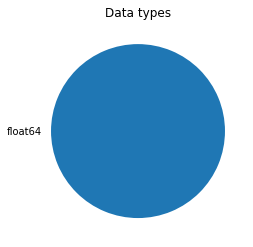

In [120]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [121]:
display(df.describe().T)

count      mean       std    min    25%    50%    75%    max
Iy   557.0  4.499820  0.896024  3.000  3.700  4.500  5.300  6.000
PF   557.0  0.825296  0.103925  0.650  0.740  0.820  0.920  1.000
dIf  557.0  0.350659  0.180566  0.037  0.189  0.345  0.486  0.769
If   557.0  1.530659  0.180566  1.217  1.369  1.525  1.666  1.949

#### Which columns could be categorical ?

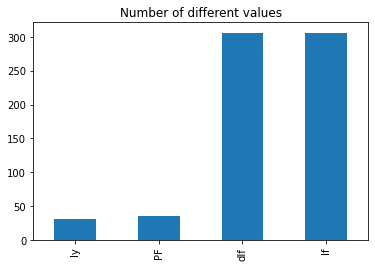

In [122]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [123]:
duplicates(df)

No duplicate rows.


Iy    PF    dIf     If
0    3.0  0.66  0.383  1.563
1    3.0  0.68  0.372  1.552
2    3.0  0.70  0.360  1.540
3    3.0  0.72  0.338  1.518
4    3.0  0.74  0.317  1.497
..   ...   ...    ...    ...
552  6.0  0.91  0.142  1.322
553  6.0  0.93  0.151  1.331
554  6.0  0.95  0.160  1.340
555  6.0  0.97  0.160  1.340
556  6.0  0.99  0.160  1.340

[557 rows x 4 columns]

#### Drop NaN:

In [124]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [125]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [126]:
display(dropped_cols)

array(['e'], dtype='<U32')

#### Encoding data:

In [127]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Iy
Encoding numeric column: PF
Encoding numeric column: dIf
Encoding numeric column: If


#### Imputing NaN using IterativeImputer

##### Imputation

In [128]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [129]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.02MB
Memory usage after optimization is: 0.00MB
Decreased by 74.5%


##### Dataframe structure after compression

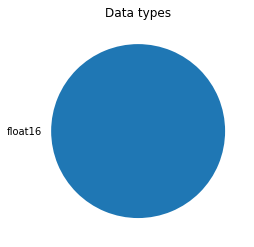

In [130]:
plot_dataframe_structure(df)

#### Outliers:

In [131]:
df = outliers(df, threshold_Z)

Using Z_score,  0  rows will be suppressed.


### Plottings

#### Correlation

In [132]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [133]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

###### Correlation with Seaborn

LinAlgError: singular matrix

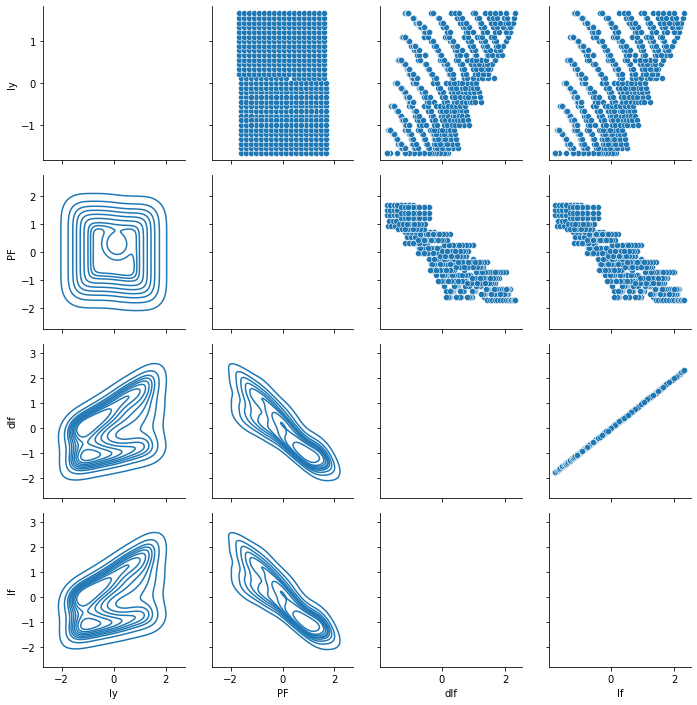

In [134]:
plot_sns_corr_regre(df, target_col)

###### Heatmap with Seaborn

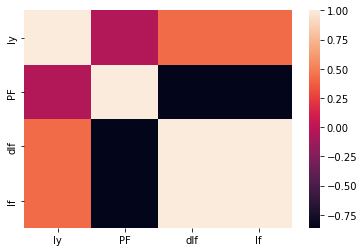

In [135]:
plt.figure()
sns.heatmap(df.corr())
plt.show()

#### Check columns that should be dropped

In [136]:
print(dropped_cols)

[]


## Splittings 

In [137]:
df = df_copy

#### Splitting dataframe in features and targets

In [138]:
y = df[target_col]

In [139]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [140]:
nb_features = len(X.columns.tolist())

In [141]:
nb_targets = 1

In [142]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [143]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [144]:
cat_selector = make_column_selector(dtype_include=object)

In [145]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [146]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [147]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [148]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [149]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [150]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [151]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Level-0 models

In [152]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTRF', make_pipeline(ntree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse'))), 
          ('DTRA', make_pipeline(ntree_preprocessor, DecisionTreeRegressor(criterion='absolute_error'))), 
          ('DTRP', make_pipeline(ntree_preprocessor, DecisionTreeRegressor(criterion='poisson'))), 
          ('RFRS', make_pipeline(ntree_preprocessor, RandomForestRegressor(criterion='squared_error', n_estimators=50))), 
          ('RFRA', make_pipeline(ntree_preprocessor, RandomForestRegressor(criterion='absolute_error', n_estimators=50))), 
          ('RFRP', make_pipeline(ntree_preprocessor, RandomForestRegressor(criterion='poisson', n_estimators=50))), 
          ('ABR', make_pipeline(ntree_preprocessor, AdaBoostRegressor())), 
          ('HGBR', make_pipeline(ntree_preprocessor, HistGradientBoostingRegressor(early_stopping=True))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR10', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPR20', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ]

##### Level-1 model

In [153]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Stacking for regression

In [154]:
model = StackingRegressor(level_0, final_estimator=level_1, n_jobs=-1)

### Model fitting

In [155]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/

CPU times: user 491 ms, sys: 83.6 ms, total: 574 ms
Wall time: 17.4 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                                  ('standardscaler',
                                                                                                                   StandardScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f40debcfac0>),
                                                                                                 ('pipeline-2'...
                                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                                  ('onehotencoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse=False))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4108329c30>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('kneighborsregressor',
                                                KNeighborsRegressor(weights='distance'))]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1), n_jobs=-1)

### Model evaluation

#### Model scoring

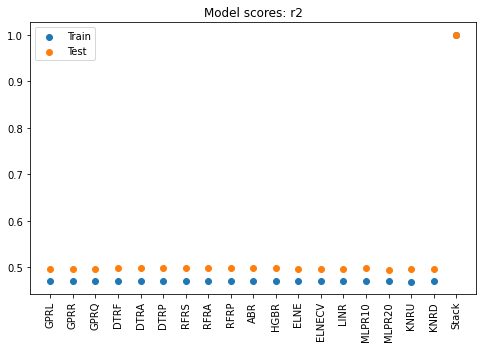

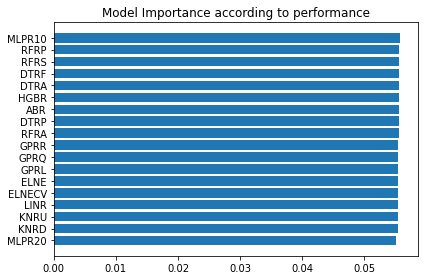

In [156]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

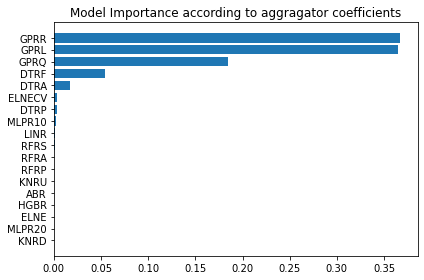

In [157]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

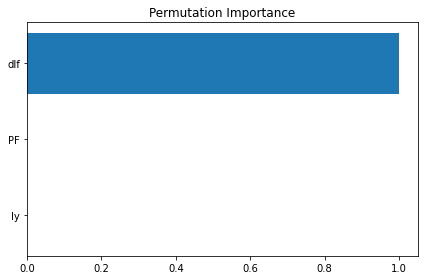

array([['Iy', -4.67423246948217e-08],
       ['PF', 1.0718367335906008e-07],
       ['dIf', 0.9999999395586513]], dtype=object)

In [158]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [159]:
features_of_interest = []

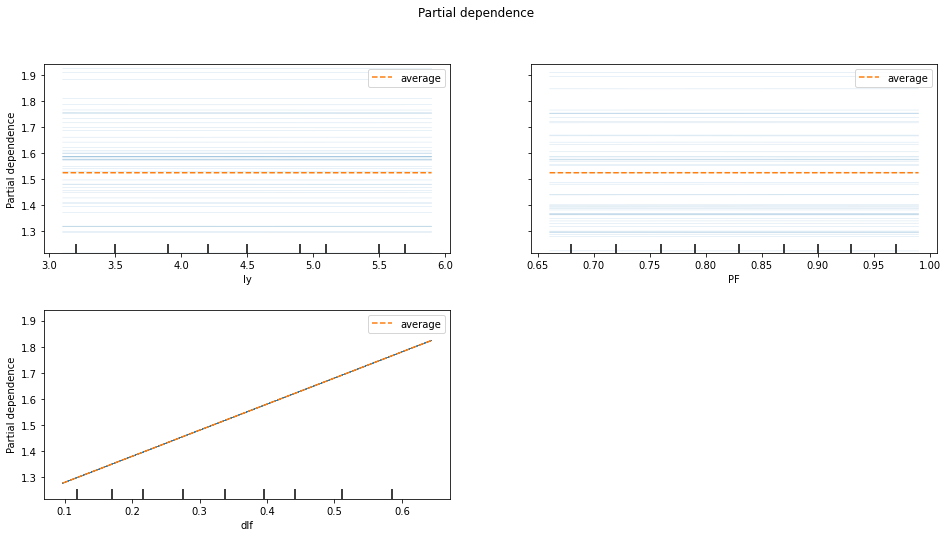

In [160]:
plot_partial_dependence(model, X_train, features_of_interest)

#### $R^2$ score

In [161]:
K_r2(model,X_train, y_train, X_test, y_test)

### Final Model

In [162]:
threshold_model = 5

* from model importance according to score, the threshold must be changed.

In [169]:
threshold_score = 0.4

##### Filtered Level-0 models

In [170]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [171]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Build final model

In [172]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

### Final Model fitting

In [173]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/

CPU times: user 182 ms, sys: 22.6 ms, total: 204 ms
Wall time: 6.3 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                                  ('standardscaler',
                                                                                                                   StandardScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f40debcfac0>),
                                                                                                 ('pipeline-2'...
                                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                                  ('onehotencoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse=False))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4108329c30>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('decisiontreeregressor',
                                                DecisionTreeRegressor(criterion='absolute_error'))]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1), n_jobs=-1)

#### Final Model scoring

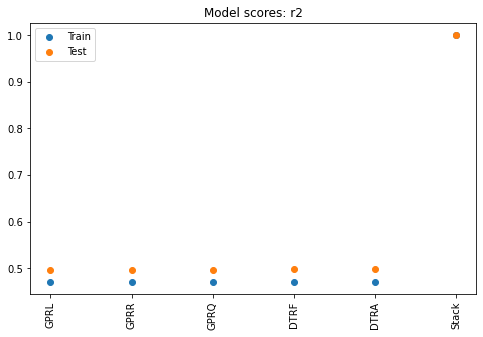

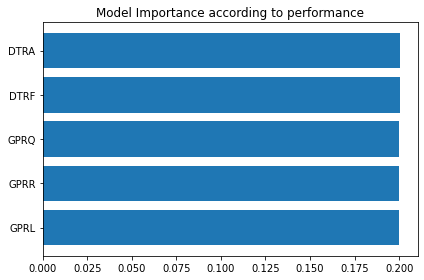

(array([['GPRL', 0.4702265581978553, 0.496239018651363],
        ['GPRR', 0.4702265581978553, 0.496239018651363],
        ['GPRQ', 0.4702265581978553, 0.496239018651363],
        ['DTRF', 0.4702265581978553, 0.49738078873911484],
        ['DTRA', 0.4702265581978553, 0.49738078873911484],
        ['Stack', 0.9999991949939616, 0.9999978509582096]], dtype=object),
 array([['GPRL', 0.19981610148404233],
        ['GPRR', 0.19981610148404233],
        ['GPRQ', 0.19981610148404233],
        ['DTRF', 0.20027584777393645],
        ['DTRA', 0.20027584777393645]], dtype=object))

In [174]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

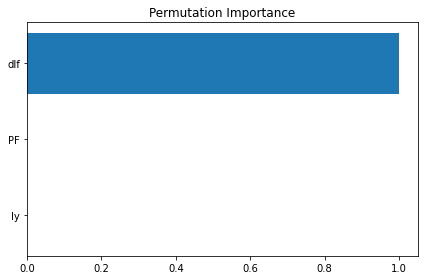

In [175]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [176]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [177]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [178]:
print(dropped_cols)

[]


#### Final $R^2$ score

In [179]:
K_r2(model,X_train, y_train, X_test, y_test)

## Deployment

### Save your model

In [180]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [181]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)